代码来自文章[AutoTS 简洁实现](https://zhuanlan.zhihu.com/p/612771866)

## 导入依赖 & 下载数据

In [1]:
import numpy as np
import pandas as pd
import datetime
from datetime import date, timedelta
import yfinance as yf   # we can use this library to download some finance data

In [2]:
d1 = date.today()
end_date = d1.strftime("%Y-%m-%d")

d2 = date.today()-timedelta(days=1000)
start_date = d2.strftime("%Y-%m-%d")

data = yf.download("BTC-USD"
                  , start = start_date
                  , end = end_date,
                  progress = False)

In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-16,47944.457031,50341.101562,47201.304688,49199.871094,49199.871094,77049582886
2021-02-17,49207.277344,52533.914062,49072.378906,52149.007812,52149.007812,80820545404
2021-02-18,52140.972656,52474.105469,51015.765625,51679.796875,51679.796875,52054723579
2021-02-19,51675.980469,56113.652344,50937.277344,55888.132812,55888.132812,63495496918
2021-02-20,55887.335938,57505.226562,54626.558594,56099.519531,56099.519531,68145460026


## 数据处理

In [4]:
# 处理数据，将index数据设置成column数据
data["Date"] = data.index
data.reset_index(drop=True, inplace= True)

In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Date
0,47944.457031,50341.101562,47201.304688,49199.871094,49199.871094,77049582886,2021-02-16
1,49207.277344,52533.914062,49072.378906,52149.007812,52149.007812,80820545404,2021-02-17
2,52140.972656,52474.105469,51015.765625,51679.796875,51679.796875,52054723579,2021-02-18
3,51675.980469,56113.652344,50937.277344,55888.132812,55888.132812,63495496918,2021-02-19
4,55887.335938,57505.226562,54626.558594,56099.519531,56099.519531,68145460026,2021-02-20


In [6]:
# 检查是否有null值
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Date         0
dtype: int64

In [7]:
# 用plotly显示股票走势
import plotly.graph_objects as go
figure = go.Figure(go.Candlestick(x = data["Date"]
                                 ,open = data["Open"]
                                 ,close = data["Close"]
                                 ,high = data["High"]
                                 ,low = data["Low"]))
figure.update_layout(title = " Bitcoin Price Analysis",
                    xaxis_rangeslider_visible = False)
figure.show()

,Open,High,Low,Close,Adj Close,Volume,Date
Open,1.000000,0.998135,0.996357,0.995166,0.995166,0.401296,-0.702595
High,0.998135,1.000000,0.996060,0.997744,0.997744,0.414017,-0.710917
Low,0.996357,0.996060,1.000000,0.997608,0.997608,0.367718,-0.687720
Close,0.995166,0.997744,0.997608,1.000000,1.000000,0.390988,-0.700943
Adj Close,0.995166,0.997744,0.997608,1.000000,1.000000,0.390988,-0.700943
Volume,0.401296,0.414017,0.367718,0.390988,0.390988,1.000000,-0.585206
Date,-0.702595,-0.710917,-0.687720,-0.700943,-0.700943,-0.585206,1.000000


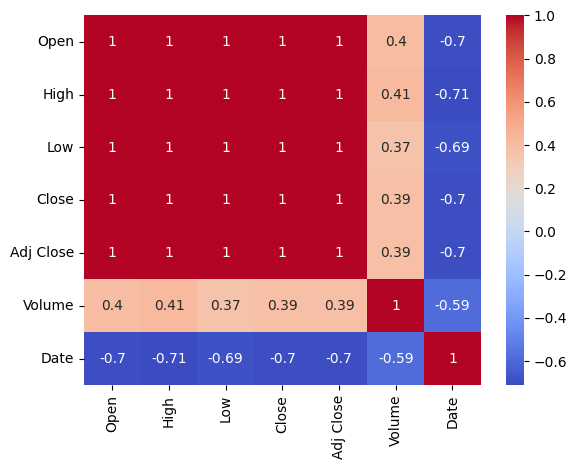

In [8]:
# 显示各参数之间的相关性
import seaborn as sns

correlation = data.corr()
correlation["Close"].sort_values(ascending = False)

sns.heatmap(correlation, cmap= "coolwarm", annot = True)
correlation

## 使用AutoTS进行训练

In [9]:
from autots import AutoTS
model = AutoTS(forecast_length = 30, ensemble = "simple", frequency = "infer", model_list='superfast', transformer_list='superfast')
model = model.fit(data, date_col = "Date", value_col = "Close", id_col = None)
prediction = model.predict()
forecast = prediction.forecast
forecast

Data frequency is: D, used frequency is: D
Model Number: 1 with model AverageValueNaive in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model GLS in generation 0 of 10
Model Number: 5 with model GLS in generation 0 of 10
Model Number: 6 with model LastValueNaive in generation 0 of 10
Model Number: 7 with model LastValueNaive in generation 0 of 10
Model Number: 8 with model LastValueNaive in generation 0 of 10
Model Number: 9 with model LastValueNaive in generation 0 of 10
Model Number: 10 with model SeasonalNaive in generation 0 of 10
Model Number: 11 with model SeasonalNaive in generation 0 of 10
Model Number: 12 with model SeasonalNaive in generation 0 of 10
Model Number: 13 with model ConstantNaive in generation 0 of 10
Model Number: 14 with model SeasonalNaive in generation 0 of 10
Model Number: 15 with model SeasonalNaive in generation 0 of 10
Model Numb

,Close
2023-11-13,34806.793858
2023-11-14,34573.593479
2023-11-15,34326.818349
2023-11-16,34123.288120
2023-11-17,34275.818097
2023-11-18,34209.970569
2023-11-19,34427.117041
2023-11-20,34346.160757
2023-11-21,35143.321622
2023-11-22,35322.603066


<Axes: title={'center': 'Close with model BestN'}>

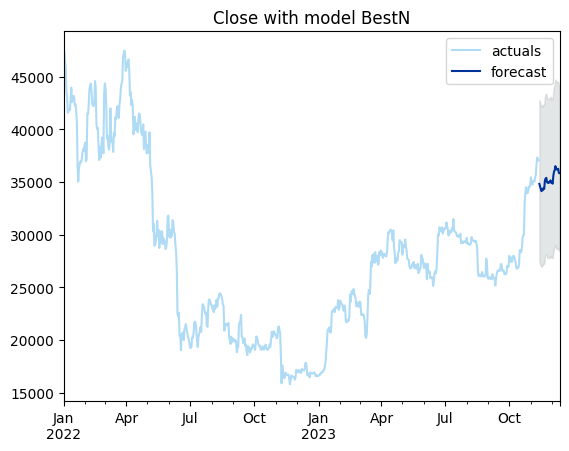

In [10]:
# plot a sample
prediction.plot(model.df_wide_numeric,
           series=model.df_wide_numeric.columns[0],
           start_date="2022-01-01")